# Linear and Logistic Regression Using NHANES Dataset
---
## Linear Regression

In [1]:
# Imports 
import pandas as pd 
import numpy as np 
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
# import NHANES data
df = pd.read_csv(Path('data/nhanes_2015_2016.csv'))

# keep only columns that will be used through out this notebook
df = df[["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]] 

# rename columns with meaninful names
df.columns = ['systolic_blood_pressure', 'age','gender','race_hispanic_origin', 'education_level', 'body_mass_index', 'smoke']

# change interger codes to string values
df.gender = df.gender.replace({1:'male', 2:'female'})
df.race_hispanic_origin = df.race_hispanic_origin.replace({1:'Mexican American', 2:'Other Hispanic',3:'Non-Hispanic White',
                                                        4:'Non-Hispanic Black', 5:'Other Race'})
df.education_level = df.education_level.replace({1:'Less than 9th grade', 2:'9-11th grade', 3:'Highschool graduate',4:'Some college',
                                                5:'College graduate', 7:'Refused',9:"Don't Know"})
df.smoke = df.smoke.replace({1:'yes', 2:'no', 7:np.nan, 9:np.nan})

# drop all null values
df.dropna(inplace = True)
df.reset_index(inplace=True, drop=True)
df.head()

,systolic_blood_pressure,age,gender,race_hispanic_origin,education_level,body_mass_index,smoke
0,128.0,62,male,Non-Hispanic White,College graduate,27.8,yes
1,146.0,53,male,Non-Hispanic White,Highschool graduate,30.8,yes
2,138.0,78,male,Non-Hispanic White,Highschool graduate,28.8,yes
3,132.0,56,female,Non-Hispanic White,College graduate,42.4,no
4,100.0,42,female,Non-Hispanic Black,Some college,20.3,no


## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.

[Reference](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.from_formula.html)

In [3]:
# instantiate ordinary least squares model and fit
model = sm.OLS.from_formula('body_mass_index ~ age', data=df).fit()

# check methods attached to the model
print([x for x in dir(model) if not x.startswith('_') and not x.startswith('_')])

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params', 'outlier_test', 'params', 'predict', 'pvalues', 'remove_data', 'resid', 'resid_pearson', 'rsquared', 'rsquared_adj', 'save', 'scale', 'ssr', 'summary', 'summary2', 't_test', 't_test_pairwise', 'tvalues', 'uncentered_tss', 'use_t', 'wald_test', 'wald_test_terms', 'wresid']


In [4]:
# print model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        body_mass_index   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.520
Date:                Sat, 18 Dec 2021   Prob (F-statistic):              0.112
Time:                        13:34:30   Log-Likelihood:                -17124.
No. Observations:                5094   AIC:                         3.425e+04
Df Residuals:                    5092   BIC:                         3.427e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0754      0.291    100.077      0.000      28.506      29.645
age            0.0088      0.006      1.587      0.112      -0.002       0.020
==============================================================================
Omnibus:                      934.389   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1852.985
Skew:                           1.105   Prob(JB):                         0.00
Kurtosis:                       4.962   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# print parameter names
model.params.keys()

Index(['Intercept', 'age'], dtype='object')

In [6]:
# print R_squared
print(f'R-square: {model.rsquared}')

# print average bmi difference between 40 year old and 20 year old 
print(f'average bmi difference between a 40 year old and a 20 year old: {model.params.age*40 - model.params.age*20}')

R-square: 0.000494668079549121
average bmi difference between a 40 year old and a 20 year old: 0.1756872046290707


Based on the coefficients for this model, we can estimate that body mass index increases on average by `0.0088` units for each additional year in age. So based on this model an older person should have greater body mass than a younger person. However, if we look into the `p-value` we can determine that this *difference is not statistically significant* 

$H_0: U_1 - U_2 = 0\ \ \ Difference\ is\ not\ statistically\ significant$   

$H_a: U_1 - U_2 \neq 0\ \ \ Difference\ is\ statistically\ significant$ 

Since this will be a two tail test we divide the p-value into two:  $\ \ 0.112 \div 2 = 0.056$. 

At the  95% confidence level, we will fail to reject the null hypothesis. We are not confident that there is a relationship between age and body mass index based on this data. Furthermore, `R-square` score implies that the fraction of the variation in body mass index explained by age is close to zero.

---
### Adding Categorical Variables as Regressors 
Add `gender` and `ethnicity` as control variables

In [7]:
# instantiate ordinary least squares model and fit
model = sm.OLS.from_formula('body_mass_index ~ age + gender + race_hispanic_origin', data=df).fit() 
# print model summary
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        body_mass_index   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     49.40
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           2.79e-59
Time:                        13:34:30   Log-Likelihood:                -16981.
No. Observations:                5094   AIC:                         3.398e+04
Df Residuals:                    5087   BIC:                         3.402e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     31.2713      0.356     87.805      0.000      30.573      31.969
gender[T.male]                                -1.0250      0.191     -5.377      0.000      -1.399      -0.651
race_hispanic_origin[T.Non-Hispanic Black]    -0.4698      0.309     -1.522      0.128      -1.075       0.135
race_hispanic_origin[T.Non-Hispanic White]    -1.8708      0.282     -6.636      0.000      -2.423      -1.318
race_hispanic_origin[T.Other Hispanic]        -0.9497      0.345     -2.753      0.006      -1.626      -0.273
race_hispanic_origin[T.Other Race]            -4.7988      0.334    -14.365      0.000      -5.454      -4.144
age                                            0.0062      0.005      1.134      0.257      -0.004       0.017
==============================================================================
Omnibus:                      915.585   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1851.566
Skew:                           1.075   Prob(JB):                         0.00
Kurtosis:                       5.025   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# print unique values under race_hispanic_origin column
print(sorted(df.race_hispanic_origin.unique()))

['Mexican American', 'Non-Hispanic Black', 'Non-Hispanic White', 'Other Hispanic', 'Other Race']


The first thing we can notice in the model summary is the missing coefficients for one gender category and one race category. The `female`
and `Mexican American` categories were automatically ommitted. Their coefficient is given a value of zero and are the *reference levels*, or defaults, for the categorical values. 

In the previous model we saw that on avarage, `age` difference was not statistically significant to impact `body mass index`. When we fit more regressors into the model, the `age` coefficient decreases and it's p-value increases. This implies that, on average, age has no meaningful impact on the dependent variable. 

When we had age as the only regressor, the R-square was close zero, so it's explanation of variation in body mass index was poor. By adding `gender and race` into the model, R-square increases to `0.055`. It is still low, but this explains the variation better. We want  $R^2$ to be as close to one as possible without overfitting. 

In [9]:
# Randomly sample 25% of the NHANES data, then fit the same model 
# instantiate ordinary least squares model and fit
model_b = sm.OLS.from_formula('body_mass_index ~ age + gender + race_hispanic_origin', data=df.sample(int(len(df)*.25))).fit() 
# print model summary
display(model_b.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        body_mass_index   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     12.37
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           1.42e-13
Time:                        13:34:30   Log-Likelihood:                -4231.4
No. Observations:                1273   AIC:                             8477.
Df Residuals:                    1266   BIC:                             8513.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     31.0504      0.738     42.080      0.000      29.603      32.498
gender[T.male]                                -0.6842      0.379     -1.803      0.072      -1.429       0.060
race_hispanic_origin[T.Non-Hispanic Black]    -1.1017      0.620     -1.776      0.076      -2.319       0.116
race_hispanic_origin[T.Non-Hispanic White]    -1.8509      0.565     -3.275      0.001      -2.960      -0.742
race_hispanic_origin[T.Other Hispanic]        -0.6929      0.699     -0.992      0.321      -2.064       0.678
race_hispanic_origin[T.Other Race]            -4.9086      0.653     -7.512      0.000      -6.191      -3.627
age                                            0.0103      0.011      0.956      0.339      -0.011       0.031
==============================================================================
Omnibus:                      184.290   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.512
Skew:                           0.965   Prob(JB):                     6.77e-65
Kurtosis:                       4.360   Cond. No.                         316.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on $R^2$, `0.046`, we can determine that the model performs worst when we randomly fit 25% of the data

### Assess Variance Structure 

Plot *residuals* against *fitted values(predicted values)*. The fitted values are the expected values, predictions, of each observation based on the model. Residuals are the differences between the expected value and actual  observations of the dependent variable.  


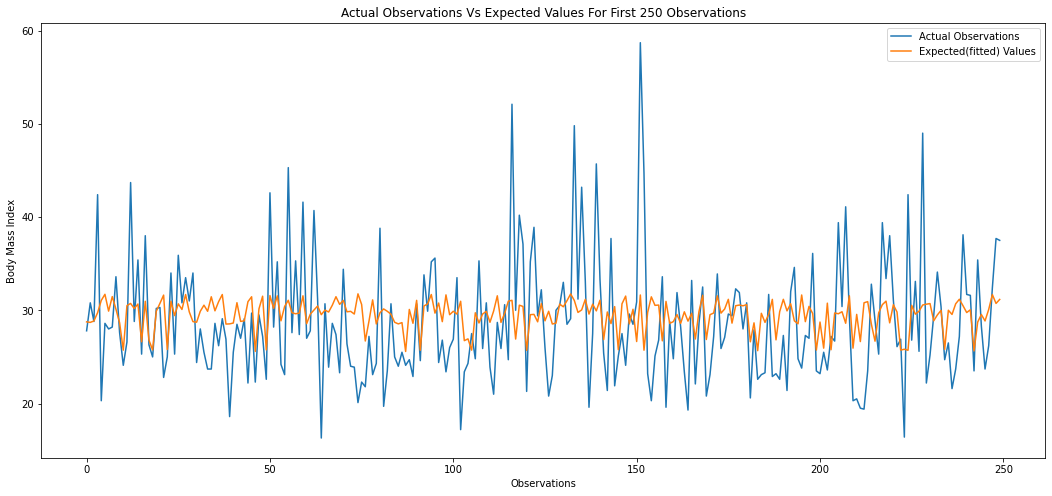

In [10]:
# create line plot real vs expected value
fig, ax = plt.subplots(figsize=(18,8))
actual_values = df.body_mass_index
expected_values = model.fittedvalues.sort_index()
ax.plot(actual_values[:250], label='Actual Observations')
ax.plot(expected_values[:250], label='Expected(fitted) Values')
ax.legend()
plt.ylabel('Body Mass Index')
plt.xlabel('Observations')
plt.title('Actual Observations Vs Expected Values For First 250 Observations')
plt.show(fig)

We can see that the current model is having a poor performance. 

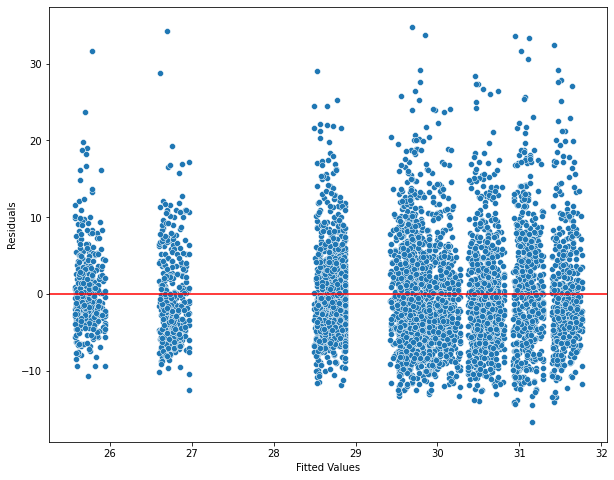

In [11]:
# residual vs fitted values scatterplot
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.axhline(y=0,color='r', linestyle='-')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.show()

Use this link as [reference](https://online.stat.psu.edu/stat462/node/117/) to interpret the scatterplot above. Based on the graph we interpret that the residuals do not bounce around the `mean(zero line)`. The assumption of linear relationship between the model's independent variables and dependent variable is not adequate.

In [12]:
# added variable plot: linearity of the relationship between BMI and age (when controlling for gender and ethnicity).
from statsmodels.graphics.regressionplots import add_lowess

model = sm.GLM.from_formula("body_mass_index ~ age + gender + race_hispanic_origin", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        body_mass_index   No. Observations:                 5094
Model:                            GLM   Df Residuals:                     5087
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                          46.089
Method:                          IRLS   Log-Likelihood:                -16981.
Date:                Sat, 18 Dec 2021   Deviance:                   2.3445e+05
Time:                        13:34:31   Pearson chi2:                 2.34e+05
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     31.2713      0.356     87.805      0.000      30.573      31.969
gender[T.male]                                -1.0250      0.191     -5.377      0.000      -1.399      -0.651
race_hispanic_origin[T.Non-Hispanic Black]    -0.4698      0.309     -1.522      0.128      -1.075       0.135
race_hispanic_origin[T.Non-Hispanic White]    -1.8708      0.282     -6.636      0.000      -2.423      -1.318
race_hispanic_origin[T.Other Hispanic]        -0.9497      0.345     -2.753      0.006      -1.626      -0.273
race_hispanic_origin[T.Other Race]            -4.7988      0.334    -14.365      0.000      -5.454      -4.144
age                                            0.0062      0.005      1.134      0.257      -0.004       0.017
==============================================================================================================
"""

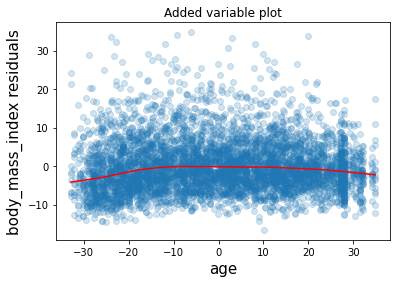

In [13]:
fig = model.plot_added_variable("age")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

In [14]:
# show age range
display(df.age.min(), df.age.max())

20

80

The red line graphs the relationship between age and body mas index. The data has been center but the scale remains the same. Based on the graph we can say that body mas index increases rapidly for between the ages 0f 20 and 35, there seems to be no change between 35 and 60, and then it begins to decline as people get older. 

## Logistic Regression 
Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the [ALQ110](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#ALQ110) variable in NHANES.  Calculate the marginal probability, odds, and log odds of this variable for women and for men.  Then calculate the odds ratio for females relative to males.

Interpreting [odds ratio](https://stats.idre.ucla.edu/stata/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/)

$odds\ of\ an\ event\ happening = p/(1-p)$

$p = probability\ of\ an\ event$

outcome: ALQ110 (at least 12 alcohol drinks during lifetime)

regressors : age, gender, education, 


In [15]:
# get required data
df = pd.read_csv(Path('data/nhanes_2015_2016.csv'), usecols=["ALQ110", "RIDAGEYR", "RIAGENDR", "DMDEDUC2"]).dropna()
df.columns = ['ALQ110', 'gender', 'age', 'education_level']
df.reset_index(inplace=True, drop=True)

# change interger codes
df.gender = df.gender.replace({1:'male', 2:'female'})
df.education_level = df.education_level.replace({1:'Less than 9th grade', 2:'9-11th grade', 3:'Highschool graduate',4:'Some college',
                                                5:'College graduate', 7:'Refused',9:"Don't Know"})
df.ALQ110 = df.ALQ110.replace({1:'yes', 2:'no', 7:np.nan, 9:np.nan}).dropna()
df.head()

,ALQ110,gender,age,education_level
0,yes,female,56,College graduate
1,yes,female,42,Some college
2,no,female,72,9-11th grade
3,yes,female,67,College graduate
4,no,female,54,Some college


In [16]:
# calculate odds 
odd_table = pd.crosstab(df.gender, df.ALQ110)
display(odd_table)

odd_table = odd_table.apply(lambda x: x/x.sum(), axis=1)

# odd = p/(1-p)
odd_table['odds'] = odd_table.loc[:,'no']/odd_table.loc[:,'yes']
display(odd_table)
odds_ratio = odd_table.loc['male','odds']/odd_table.loc['female','odds']
print(f"\nodds ratio(male odds/female odd): {round(odds_ratio,2)}")

ALQ110,no,yes
gender,,
female,616,503
male,247,209


ALQ110,no,yes,odds
gender,,,
female,0.550492,0.449508,1.224652
male,0.541667,0.458333,1.181818



odds ratio(male odds/female odd): 0.97


The probability that a woman has had at least 12 alcohol drinks is about the same as a man(0.449508 versus 0.458333). This is also shown by the odds they are close. This results in an `odd ratio` that is close to 1, meaning both females and males are equally likely to have had at least 12 alchol drinks according to this dataset. 

In [17]:
# log odds
odd_table['log_odds'] = np.log(odd_table['odds'])
display(odd_table)

ALQ110,no,yes,odds,log_odds
gender,,,,
female,0.550492,0.449508,1.224652,0.202657
male,0.541667,0.458333,1.181818,0.167054


In [18]:
# calculate odds from log_odds, just exponentiate the log odds
np.exp(0.202657)

1.2246523404469272

In [19]:
# instantiate and fit model
model = sm.GLM.from_formula("ALQ110 ~ gender", family=sm.families.Binomial(), data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Generalized Linear Model Regression Results                       
=========================================================================================
Dep. Variable:     ['ALQ110[no]', 'ALQ110[yes]']   No. Observations:                 1575
Model:                                       GLM   Df Residuals:                     1573
Model Family:                           Binomial   Df Model:                            1
Link Function:                             logit   Scale:                          1.0000
Method:                                     IRLS   Log-Likelihood:                -1084.4
Date:                           Sat, 18 Dec 2021   Deviance:                       2168.8
Time:                                   13:34:31   Pearson chi2:                 1.58e+03
No. Iterations:                                4                                         
Covariance Type:                       nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2027      0.060      3.372      0.001       0.085       0.320
gender[T.male]    -0.0356      0.112     -0.319      0.750      -0.254       0.183
==================================================================================
"""

In [20]:
# calculate diff between male log_odds and female log_odds 
odd_table.loc['male','log_odds'] - odd_table.loc['female','log_odds']

-0.03560270877061422

The difference for the `logs odds` between male and females is equal to the `gender coefficient` given by the regression model. The female category is the reference level with a coefficient of zero. This relationship will hold as long as we are working a a single binary regressor.

With a `p-value = 0.750` and two sided test, we will fail to reject a hypothesis that the mean difference between male and female that have consumed at least 12 alcohol drinks is zero. 

In [21]:
df.education_level.value_counts()

Some college           429
College graduate       340
Highschool graduate    317
Less than 9th grade    290
9-11th grade           202
Don't Know               2
Name: education_level, dtype: int64

In [22]:
# Use logistic regression to relate drinking to age, gender, and education.
# there only two values with 'Don't know' responses so we can drop it
df = df[df.education_level != "Don't Know"]
display(df.education_level.value_counts())
model = sm.GLM.from_formula("ALQ110 ~ age + gender + education_level", family=sm.families.Binomial(), data=df).fit()
model.summary()

Some college           429
College graduate       340
Highschool graduate    317
Less than 9th grade    290
9-11th grade           202
Name: education_level, dtype: int64

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Generalized Linear Model Regression Results                       
=========================================================================================
Dep. Variable:     ['ALQ110[no]', 'ALQ110[yes]']   No. Observations:                 1574
Model:                                       GLM   Df Residuals:                     1567
Model Family:                           Binomial   Df Model:                            6
Link Function:                             logit   Scale:                          1.0000
Method:                                     IRLS   Log-Likelihood:                -1059.5
Date:                           Sat, 18 Dec 2021   Deviance:                       2118.9
Time:                                   13:34:31   Pearson chi2:                 1.57e+03
No. Iterations:                                4                                         
Covariance Type:                       nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.9182      0.219      4.200      0.000       0.490       1.347
gender[T.male]                            -0.0172      0.114     -0.151      0.880      -0.240       0.205
education_level[T.College graduate]       -0.4886      0.182     -2.681      0.007      -0.846      -0.131
education_level[T.Highschool graduate]    -0.4013      0.184     -2.179      0.029      -0.762      -0.040
education_level[T.Less than 9th grade]     0.4087      0.194      2.105      0.035       0.028       0.789
education_level[T.Some college]           -0.5421      0.175     -3.098      0.002      -0.885      -0.199
age                                       -0.0086      0.003     -2.951      0.003      -0.014      -0.003
==========================================================================================================
"""

In this model we can see that all categories under education level are statistically associated with alcohol consumption. People that have completed at least high school are less likely to drink than people with lower education attainment. This is supported by their coefficient values and low p-values. 

The gender parameter did not change to something meaningful after adding age and education to the model. 

In [23]:
# odds ratio between the drinking status for college graduates and high school graduates (with no college), 
# holding gender and age fixed
odds_college_grad = np.exp(-0.4886)
odds_hs_grad = np.exp(-0.4013)
odds_college_grad/odds_hs_grad

0.9164021337508069

Keeping age and gender fixed, college graduates and high school graduates are about equally likely to drink since the ratio is close to one. High school graduates drinking odds are higher than college graduates

In [24]:
# Construct a CERES plot for the relationship between drinking and age 
print([x for x in dir(model) if not x.startswith('__') and not x.startswith('_')])

['aic', 'bic', 'bic_deviance', 'bic_llf', 'bse', 'conf_int', 'converged', 'cov_kwds', 'cov_params', 'cov_type', 'deviance', 'df_model', 'df_resid', 'f_test', 'family', 'fit_history', 'fittedvalues', 'get_hat_matrix_diag', 'get_influence', 'get_prediction', 'initialize', 'k_constant', 'llf', 'llnull', 'load', 'method', 'mle_settings', 'model', 'mu', 'nobs', 'normalized_cov_params', 'null', 'null_deviance', 'params', 'pearson_chi2', 'plot_added_variable', 'plot_ceres_residuals', 'plot_partial_residuals', 'predict', 'pvalues', 'remove_data', 'resid_anscombe', 'resid_anscombe_scaled', 'resid_anscombe_unscaled', 'resid_deviance', 'resid_pearson', 'resid_response', 'resid_working', 'save', 'scale', 'summary', 'summary2', 't_test', 't_test_pairwise', 'tvalues', 'use_t', 'wald_test', 'wald_test_terms']


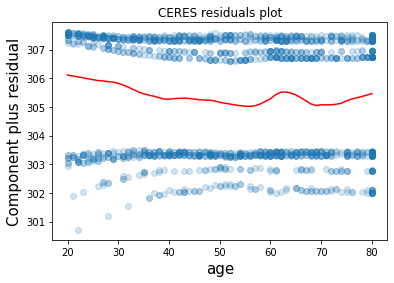

In [27]:
# https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_ceres_residuals.html
fig = model.plot_ceres_residuals("age")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax) # https://www.statisticshowto.com/lowess-smoothing/

The relationship between age and drinking is not perfectly linear. For ages 20-55 alcohol consumptions declines. We also saw this by the negative coefficients in the model, people with higher levels of educations have lower odds of drinking.  m
